 Part 1
### Basic variables in terms of solar or earth masses

In [20]:
import scipy as sp
import numpy as np
import pandas as pd
import astropy as ap
import matplotlib.pyplot as plt
M_star = 0.145
R_star = 0.178
M_planet = 16.792
print("Mass of the star: " + str(M_star))
print("Radius of the star: " + str(R_star))
print("Mass of the planet: " + str(M_planet))

Mass of the star: 0.145
Radius of the star: 0.178
Mass of the planet: 16.792


### Create a graph of the transits

<Axes: title={'center': 'Light Curve of the Transiting Exoplanet'}, xlabel='Time (days)', ylabel='Normalized Flux (%)'>

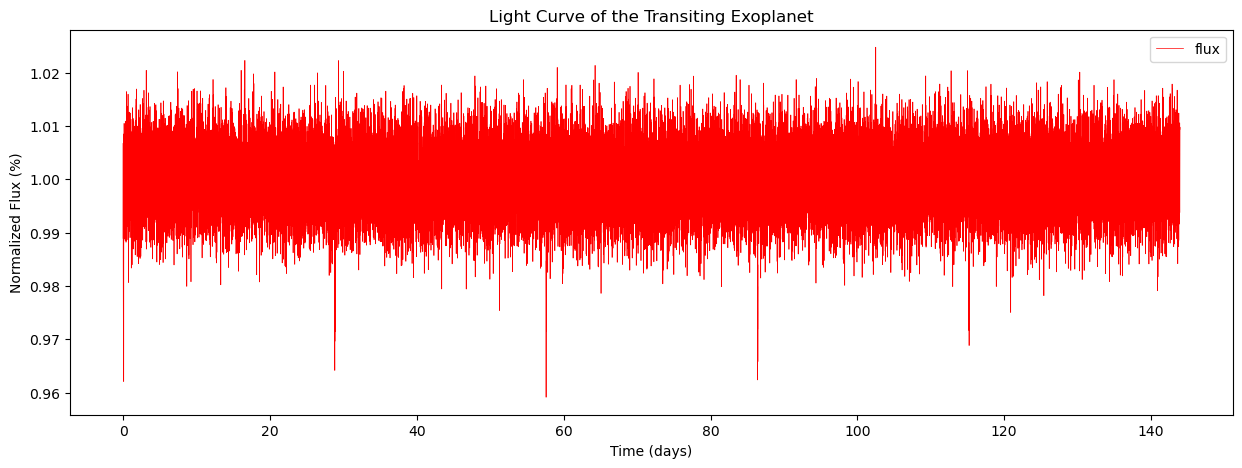

In [21]:
#read in the data from student_022.txt
data = pd.read_csv('student_022.txt', sep = '\s+', header = None)
data.columns = ['time', 'flux']
#convert the time to days
data['timeD'] = data['time']/86400
data.plot(x = 'timeD', y = 'flux', kind = 'line', xlabel = 'Time (days)', ylabel = 'Normalized Flux (%)', figsize = (15, 5), color='red', linewidth=0.5, title = 'Light Curve of the Transiting Exoplanet')

# Part 2
### Finding the transits
#### Create a function to calculate the average and standard deviation of the flux values between the start and end times

In [22]:
def averageTransitDepth(sTime, eTime):
    #get all the flux values between the start and end times
    #return the average of the flux values
    return 1 - data.where((data['time'] >= sTime) & (data['time'] <= eTime))['flux'].mean()
def stdTransitDepth(sTime, eTime):
    #get all the flux values between the start and end times
    #return the standard deviation of the flux values
    return data.where((data['time'] >= sTime) & (data['time'] <= eTime))['flux'].std()

#### Determine the start and end times of the transits

In [23]:
sTime = []
eTime = []
transits = []
for i in range(1, len(data['flux'])):
    if data['flux'][i - 1] > 0.995 and data['flux'][i] < 0.9949:
        sTime.append(data['time'][i - 1])
        #print("Start time: " + str(sTime))
for i in range(1, len(data['flux'])):
    if data['flux'][i - 1] < 0.9949 and data['flux'][i] > 0.995:
        eTime.append(data['time'][i])
        #print("End time: " + str(eTime))
# if the start and end time is aproximately the length of the transit and the average values of the flux are below a threshold, then flag the start and end times as the start and end of the transits
count = 0
for i in range(len(sTime)):
    vectorsub = np.subtract(eTime, sTime[i])
    for j in range(len(eTime)):
        if vectorsub[j] > 6500 and \
                vectorsub[j] < 9000 and \
                averageTransitDepth(sTime[i],eTime[j]) > 0.017:
            transits.append([sTime[i], eTime[j]])
            print("Transit detected starting at", sTime[i], "seconds and ending at", eTime[j], "seconds.")
            count += 1
            break
#print("Start time: " + str(sTime))
#print("End time: " + str(eTime))

Transit detected starting at 694.08460915 seconds and ending at 8329.0153098 seconds.
Transit detected starting at 2487946.2815 seconds and ending at 2495581.2122 seconds.
Transit detected starting at 4974504.3938 seconds and ending at 4982833.4091 seconds.
Transit detected starting at 7462103.633 seconds and ending at 7469738.5637 seconds.
Transit detected starting at 9949355.8299 seconds and ending at 9956643.7183 seconds.


### Plot of the first transit

<Axes: title={'center': 'Light Curve of the First Transit'}, xlabel='Time (seconds)', ylabel='Normalized Flux (%)'>

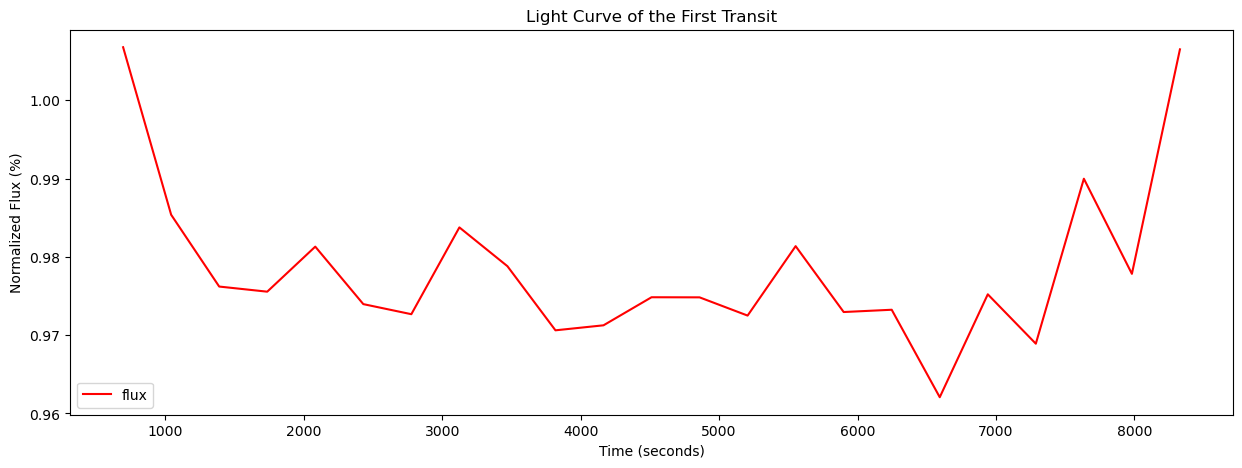

In [24]:
data.where((data['time'] <= transits[0][1]) & (data['time'] >= transits[0][0])).plot(x = 'time', y = 'flux', kind = 'line', xlabel = 'Time (seconds)', ylabel = 'Normalized Flux (%)', figsize = (15, 5), color='red', linewidth=1.5, title = 'Light Curve of the First Transit')

### Properties of the first transit

In [25]:
#adding a buffer of 347 seconds to the start and end times of the first transit so that the average and standard deviation are not affected by outliers at the start and end of the transit
print("The average depth of the first transit is", averageTransitDepth(transits[0][0], transits[0][1]))
print("The standard deviation of the first transit is", stdTransitDepth(transits[0][0], transits[0][1]))

The average depth of the first transit is 0.021449769320869505
The standard deviation of the first transit is 0.010625782898794837


# Part 3
### Find the orbital period of the planet

In [26]:
transitT = np.array(transits).transpose()
timeDiffs = []
for i in range(1, len(transitT[0])):
    timeDiffs = transitT[0][i] - transitT[0][i - 1]
print("Average orbital period of the planet in seconds:",np.average(timeDiffs))
print("Average orbital period of the planet in days:",np.average(timeDiffs)/86400)

Average orbital period of the planet in seconds: 2487252.1969
Average orbital period of the planet in days: 28.787641167824074


### Overplot of the transits

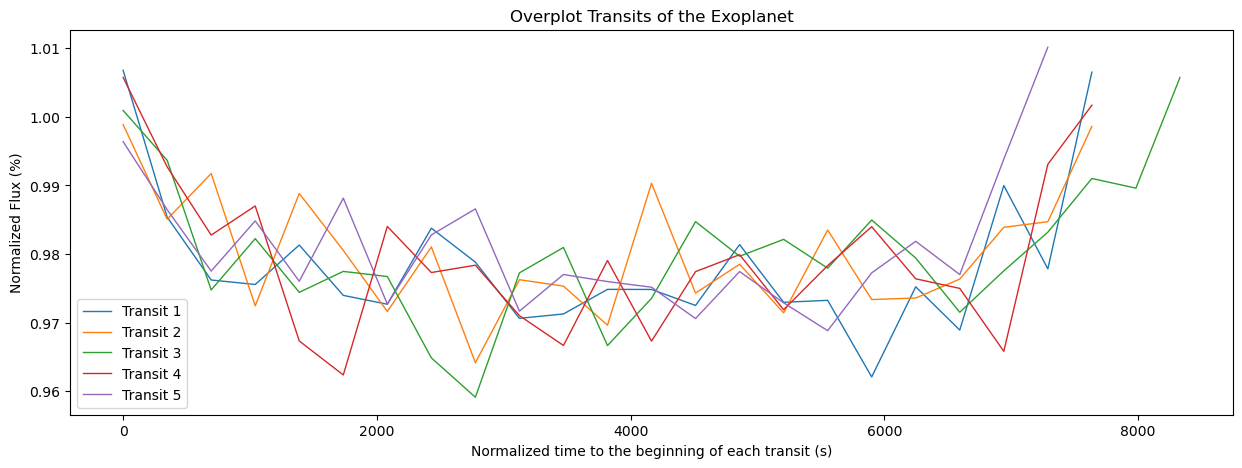

In [27]:
plt.figure(figsize=(15, 5))
for i in range(len(transits)):
    time = list((data['time'].where((data['time'] >= transits[i][0]) & (data['time'] <= transits[i][1])) - transits[i][0]).dropna())
    flux = list((data['flux'].where((data['time'] <= transits[i][1]) & (data['time'] >= transits[i][0]))).dropna())
    plt.plot(time, flux, linewidth=1, label='Transit ' + str(i + 1))
plt.xlabel('Normalized time to the beginning of each transit (s)')
plt.ylabel('Normalized Flux (%)')
plt.title('Overplot Transits of the Exoplanet')
plt.legend()
plt.show()

### Calculating the size of the planet

In [28]:
depths = []
standardDeviations = []

for i in range(len(transits)):
    depths.append(averageTransitDepth(transits[i][0], transits[i][1]))
    standardDeviations.append(stdTransitDepth(transits[i][0], transits[i][1]))
R_planets = R_star * np.sqrt(depths)
#convert between solar radii and earth radii
R_planets = R_planets * 109.076  # Convert to Earth radii
R_planet = np.average(R_planets)
print("Size of the planet is:", R_planet, "R_Earth, with error:", R_planets.std() / np.sqrt(len(transits)), "R_Earth")

Size of the planet is: 2.752945300905833 R_Earth, with error: 0.025747906469918994 R_Earth
